In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('DiD_data.csv')
df = pd.DataFrame(data)

In [3]:
df.head()

,rssd9001,rssd9999,bhc_avgtradingratio,treat_3_b_avg,after_DFA_1,dep_roa1,dep_leverage,dep_lnassets,dep_creditrisk_total3,dep_cir,dep_depositratio,dep_loans_REratio,dep_liquidity,dep_cpp_bankquarter
0,1020180,20040930,0.0,0,0,0.002772,0.081957,15.601202,0.013304,0.463811,0.561805,0.593738,0.024337,0
1,1020180,20041231,0.0,0,0,0.003045,0.082480,15.630583,0.009732,0.456392,0.557617,0.601763,0.025446,0
2,1020180,20050331,0.0,0,0,0.002616,0.082074,15.644925,0.011830,0.444011,0.556980,0.600700,0.025153,0
3,1020180,20050630,0.0,0,0,0.002647,0.081712,15.679702,0.013654,0.433771,0.571642,0.601042,0.023670,0
4,1020180,20050930,0.0,0,0,0.002867,0.082944,15.661868,0.012456,0.400985,0.577408,0.581438,0.029793,0


In [4]:
df.shape

(81560, 14)

In [5]:
# rename columns
df.columns = ['Bank', 'Date', 'TAR', 'Affected_BHC', 'After_DFA', 'Profitability', 'Leverage_ratio', 'Total_assets', 'Non_performing_loan_ratio', 'Cost_income_ratio', 'Deposit_ratio', 'Real_estate_loan_ratio', 'Liquidity_ratio', 'CPP_recipient']

In [6]:
df.describe().round(2)

,Bank,Date,TAR,Affected_BHC,After_DFA,Profitability,Leverage_ratio,Total_assets,Non_performing_loan_ratio,Cost_income_ratio,Deposit_ratio,Real_estate_loan_ratio,Liquidity_ratio,CPP_recipient
count,81560.00,81560.00,41442.00,81560.00,81560.00,56938.00,57017.00,61771.00,44432.00,42382.00,79172.00,44432.00,55159.00,81560.00
mean,1803535.29,20092215.02,0.00,0.01,0.45,0.00,0.09,13.52,0.03,0.53,0.68,0.74,0.05,0.04
std,803001.25,33273.16,0.02,0.11,0.50,0.01,0.04,1.35,0.03,0.36,0.11,0.16,0.05,0.20
min,1020180.00,20040930.00,0.00,0.00,0.00,-0.39,-0.76,5.89,0.00,-12.48,0.00,0.00,0.00,0.00
25%,1118434.00,20060930.00,0.00,0.00,0.00,0.00,0.07,12.62,0.01,0.41,0.64,0.66,0.02,0.00
50%,1248304.00,20090331.00,0.00,0.00,0.00,0.00,0.09,13.23,0.02,0.50,0.70,0.76,0.04,0.00
75%,2537957.00,20120930.00,0.00,0.00,1.00,0.00,0.11,13.95,0.03,0.62,0.75,0.85,0.06,0.00
max,3836442.00,20150630.00,0.43,1.00,1.00,0.93,1.16,21.67,0.73,45.93,1.00,1.01,0.84,1.00


## Baseline all
$TAR_{i,t} = \alpha + \beta_{1} * After DFA + \beta_{2} * TAR_{affectedness}$ 
$+ \beta_{3} * After DFA * TAR_{affectedness}$ 
$+ \gamma_{i} + ControlVariables_{i,t} + \delta_{t} + \epsilon_{i,t}$

# Basic DiD model

$TAR_{i,t} = \beta_{1} * After DFA + \beta_{2} * TAR_{affectedness}$ 
$+ \beta_{3} * After DFA * TAR_{affectedness}$ 
$+ \gamma_{i} + FixedEffects$

AfterDFA = 1 for Q3'10 to Q2'15 and 0 for Q3'04 to Q2'09

Affectedness = average TAR where After DFA = 0



In [7]:
# reconstruct panel A
import statsmodels.api as sm
from statsmodels.formula.api import ols

panel_A_1 = ols('TAR ~ After_DFA', df).fit()
panel_A_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TAR   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     6.419
Date:                Mon, 25 Oct 2021   Prob (F-statistic):             0.0113
Time:                        23:15:42   Log-Likelihood:             1.0329e+05
No. Observations:               41442   AIC:                        -2.066e+05
Df Residuals:                   41440   BIC:                        -2.066e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0024      0.000     19.207      0.000       0.002       0.003
After_DFA      0.0005      0.000      2.534      0.011       0.000       0.001
==============================================================================
Omnibus:                    71532.559   Durbin-Watson:                   0.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         57471366.578
Skew:                          12.333   Prob(JB):                         0.00
Kurtosis:                     183.761   Cond. No.                         2.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# reconstruct panel A2
panel_A_2 = ols('TAR ~ After_DFA + Profitability + Leverage_ratio + Total_assets + Non_performing_loan_ratio + Cost_income_ratio + Deposit_ratio + Real_estate_loan_ratio + Liquidity_ratio + CPP_recipient', df).fit()
panel_A_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TAR   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 25 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:15:42   Log-Likelihood:             1.0595e+05
No. Observations:               40026   AIC:                        -2.119e+05
Df Residuals:                   40015   BIC:                        -2.118e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.0207      0.002    -13.677      0.000      -0.024      -0.018
After_DFA                    -0.0010      0.000     -4.868      0.000      -0.001      -0.001
Profitability                 0.0321      0.022      1.484      0.138      -0.010       0.075
Leverage_ratio               -0.0495      0.003    -19.054      0.000      -0.055      -0.044
Total_assets                  0.0043   7.27e-05     59.434      0.000       0.004       0.004
Non_performing_loan_ratio     0.0203      0.003      7.224      0.000       0.015       0.026
Cost_income_ratio             0.0010      0.000      2.921      0.003       0.000       0.002
Deposit_ratio                -0.0337      0.001    -41.532      0.000      -0.035      -0.032
Real_estate_loan_ratio       -0.0138      0.001    -23.362      0.000      -0.015      -0.013
Liquidity_ratio              -0.0006      0.002     -0.297      0.766      -0.005       0.003
CPP_recipient                -0.0016      0.000     -4.407      0.000      -0.002      -0.001
==============================================================================
Omnibus:                    63938.993   Durbin-Watson:                   0.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         43593657.697
Skew:                          10.478   Prob(JB):                         0.00
Kurtosis:                     163.312   Cond. No.                     3.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# add variable Affect
df['Affect'] = (df['TAR'].mask(~df['After_DFA'].eq(0)).groupby(df['Bank']).transform('mean'))

In [10]:
# reconstruct panel A3
panel_A_3 = ols('TAR ~ After_DFA + Affect + Affect*After_DFA + Profitability + Leverage_ratio + Total_assets + Non_performing_loan_ratio + Cost_income_ratio + Deposit_ratio + Real_estate_loan_ratio + Liquidity_ratio + CPP_recipient', df).fit()
panel_A_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TAR   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 3.061e+04
Date:                Mon, 25 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:15:42   Log-Likelihood:             1.4705e+05
No. Observations:               40026   AIC:                        -2.941e+05
Df Residuals:                   40013   BIC:                        -2.940e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.0030      0.001     -5.469      0.000      -0.004      -0.002
After_DFA                 -2.039e-05   7.68e-05     -0.266      0.791      -0.000       0.000
Affect                        0.9925      0.002    402.166      0.000       0.988       0.997
Affect:After_DFA             -0.1611      0.003    -52.818      0.000      -0.167      -0.155
Profitability                -0.0051      0.008     -0.656      0.512      -0.020       0.010
Leverage_ratio                0.0013      0.001      1.338      0.181      -0.001       0.003
Total_assets                  0.0002   2.72e-05      8.258      0.000       0.000       0.000
Non_performing_loan_ratio     0.0017      0.001      1.724      0.085      -0.000       0.004
Cost_income_ratio             0.0002      0.000      1.465      0.143   -6.33e-05       0.000
Deposit_ratio                 0.0004      0.000      1.298      0.194      -0.000       0.001
Real_estate_loan_ratio       -0.0007      0.000     -3.500      0.000      -0.001      -0.000
Liquidity_ratio              -0.0005      0.001     -0.709      0.479      -0.002       0.001
CPP_recipient                -0.0002      0.000     -1.936      0.053      -0.000    3.08e-06
==============================================================================
Omnibus:                    51911.637   Durbin-Watson:                   0.524
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        103525182.575
Skew:                           6.371   Prob(JB):                         0.00
Kurtosis:                     251.822   Cond. No.                     3.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
# reconstructing panel A4
from linearmodels import PanelOLS

df_FE = df.copy()
df_FE = df_FE.set_index(['Bank', 'Date'])
df_FE['After_DFAxAffect'] =  df_FE['After_DFA'] * df_FE['Affect']
df_FE = df_FE.dropna()
exog = df_FE.drop(columns = ['TAR', 'After_DFA', 'Affected_BHC','Affect'])


# Regression
FE = PanelOLS(df_FE.TAR, exog,
              entity_effects = True,
              time_effects=True,
              drop_absorbed=True
              )
              
# Result
result = FE.fit(cov_type = 'clustered',
             cluster_entity=True,
             )

result

Dep. Variable:,TAR,R-squared:,0.0824
Estimator:,PanelOLS,R-squared (Between):,-0.5099
No. Observations:,40026,R-squared (Within):,0.0805
Date:,"Mon, Oct 25 2021",R-squared (Overall):,-0.5159
Time:,23:15:43,Log-likelihood,1.525e+05
Cov. Estimator:,Clustered,,
,,F-statistic:,337.16
Entities:,2473,P-value,0.0000
Avg Obs:,16.185,Distribution:,"F(10,37551)"
Min Obs:,0.0000,,
Max Obs:,38.000,F-statistic (robust):,4.6735


# Robustness Tests
## Panel B1

In [12]:
# reconstructing panel B1

df_B1 = df.copy()
df_B1 = df_B1.set_index(['Bank', 'Date'])
df_B1['After_DFAxAffectedBHC'] =  df_B1['After_DFA'] * df_B1['Affected_BHC']
df_B1 = df_B1.dropna()
exog = df_B1.drop(columns = ['TAR', 'After_DFA', 'Affected_BHC','Affect'])


# Regression
FE = PanelOLS(df_B1.TAR, exog,
              entity_effects = True,
              time_effects=True,
              drop_absorbed=True
              )
              
# Result
result = FE.fit(cov_type = 'clustered',
             cluster_entity=True,
             cluster_time=True
             )

result

Dep. Variable:,TAR,R-squared:,0.0532
Estimator:,PanelOLS,R-squared (Between):,-0.3306
No. Observations:,40026,R-squared (Within):,0.0519
Date:,"Mon, Oct 25 2021",R-squared (Overall):,-0.3389
Time:,23:15:44,Log-likelihood,1.519e+05
Cov. Estimator:,Clustered,,
,,F-statistic:,211.07
Entities:,2473,P-value,0.0000
Avg Obs:,16.185,Distribution:,"F(10,37551)"
Min Obs:,0.0000,,
Max Obs:,38.000,F-statistic (robust):,2.0684


## Panel B2

In [13]:
# reconstruction panel B2
# pg 15 "based on a simple logit regression on our vector of control variables"
from pymatch.Matcher import Matcher

df_B2 = df.copy()
df_B2['After_DFAxAffectedBHC'] =  df_B2['After_DFA'] * df_B2['Affected_BHC']
df_B2 = df_B2.drop(columns = ['After_DFA', 'Affected_BHC','Affect'])
test = df_B2[df_B2.After_DFAxAffectedBHC == 1]
control = df_B2[df_B2.After_DFAxAffectedBHC == 0]

m = Matcher(test, control, yvar = 'After_DFAxAffectedBHC', exclude=['TAR', 'Bank', 'Date'])

Formula:
After_DFAxAffectedBHC ~ Profitability+Leverage_ratio+Total_assets+Non_performing_loan_ratio+Cost_income_ratio+Deposit_ratio+Real_estate_loan_ratio+Liquidity_ratio+CPP_recipient
n majority: 39767
n minority: 259


In [14]:
m.fit_scores(balance=True, nmodels=100)

Fitting Models on Balanced Samples: 31\100

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Fitting Models on Balanced Samples: 100\100
Average Accuracy: 96.16%


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


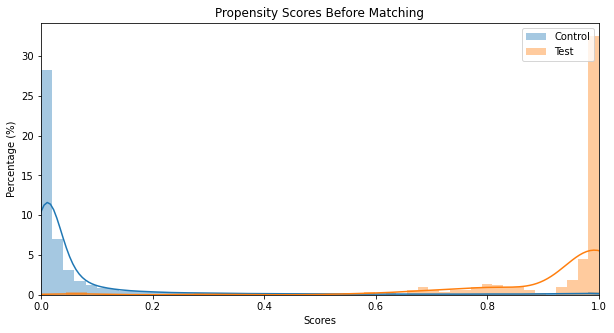

In [15]:
import matplotlib.pyplot as plt
m.predict_scores()
m.plot_scores()

In [16]:
m.match(method="min", nmatches=1, threshold=0.0001)
m.record_frequency()

,freq,n_records
0,1,381
1,2,29
2,3,8
3,4,1
4,5,4
5,6,2
6,9,1
7,10,1


In [17]:
m.matched_data.head(10)

,Bank,Date,TAR,Profitability,Leverage_ratio,Total_assets,Non_performing_loan_ratio,Cost_income_ratio,Deposit_ratio,Real_estate_loan_ratio,Liquidity_ratio,CPP_recipient,After_DFAxAffectedBHC,scores,match_id,record_id
0,1032473,20120630,0.069622,-0.001221,0.102024,17.989805,0.008294,0.584337,0.095809,0.163842,0.163892,0,1,0.993885,0,0
20801,1245415,20141231,0.033597,0.000946,0.121822,18.568062,0.025335,0.799372,0.383660,0.382616,0.140933,0,0,0.993900,0,20801
1,1032473,20120930,0.058777,0.001633,0.091507,18.108091,0.006535,0.627043,0.091018,0.168826,0.283781,0,1,0.998601,1,1
11010,1111435,20051231,0.029548,0.002466,0.061725,18.400434,0.000615,0.509281,0.025005,0.000000,0.153578,0,0,0.998605,1,11010
2,1032473,20121231,0.063189,0.002133,0.087786,18.121574,0.006373,0.625000,0.089258,0.167322,0.234625,0,1,0.998471,2,2
11011,1111435,20060331,0.034140,0.002887,0.063212,18.461699,0.000445,0.493831,0.025512,0.000000,0.137679,0,0,0.998499,2,11011
3,1032473,20130331,0.052756,0.001280,0.088133,18.139948,0.005331,0.657600,0.097948,0.164545,0.193758,0,1,0.998162,3,3
33908,2816906,20090630,0.299876,0.001631,0.004784,19.719099,0.017099,0.450196,0.017631,0.133970,0.182785,0,0,0.998117,3,33908
4,1032473,20130630,0.045880,0.001478,0.090702,18.092066,0.011537,0.608571,0.111379,0.165990,0.203227,0,1,0.997762,4,4
11013,1111435,20060930,0.032520,0.002587,0.062736,18.537058,0.000431,0.464324,0.021386,0.000000,0.113817,0,0,0.997851,4,11013


In [18]:
df_B2m = m.matched_data.copy()
df_B2m = df_B2m.set_index(['Bank', 'Date'])
df_B2m = df_B2m.dropna()
exog = df_B2m.drop(columns = ['TAR', 'scores', 'match_id', 'record_id'])

# Regression
FE = PanelOLS(df_B2m.TAR, exog,
              entity_effects = True,
              time_effects=True,
              drop_absorbed=True
              )
              
# Result
result = FE.fit(cov_type = 'clustered',
             cluster_entity=True,
             )

result

Dep. Variable:,TAR,R-squared:,0.0612
Estimator:,PanelOLS,R-squared (Between):,-5.3254
No. Observations:,518,R-squared (Within):,0.1064
Date:,"Mon, Oct 25 2021",R-squared (Overall):,-3.0880
Time:,23:15:51,Log-likelihood,1408.0
Cov. Estimator:,Clustered,,
,,F-statistic:,2.5604
Entities:,78,P-value,0.0052
Avg Obs:,6.6410,Distribution:,"F(10,393)"
Min Obs:,1.0000,,
Max Obs:,69.000,F-statistic (robust):,0.7941


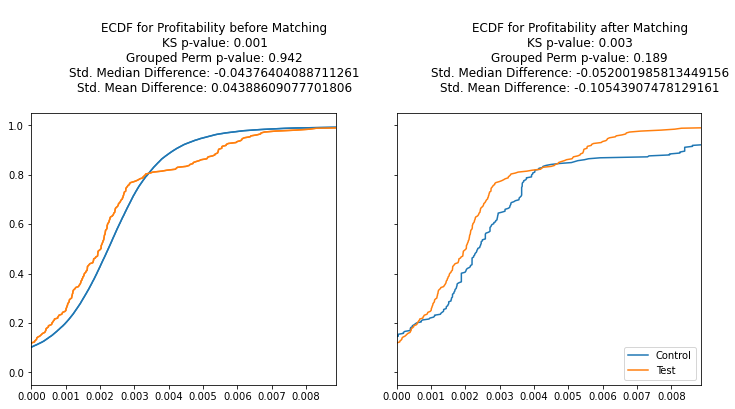

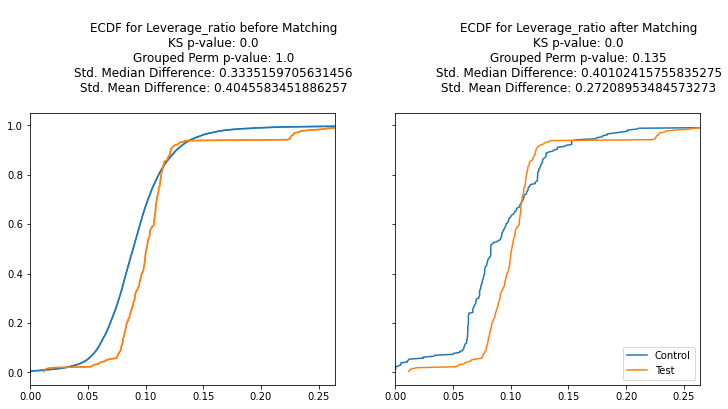

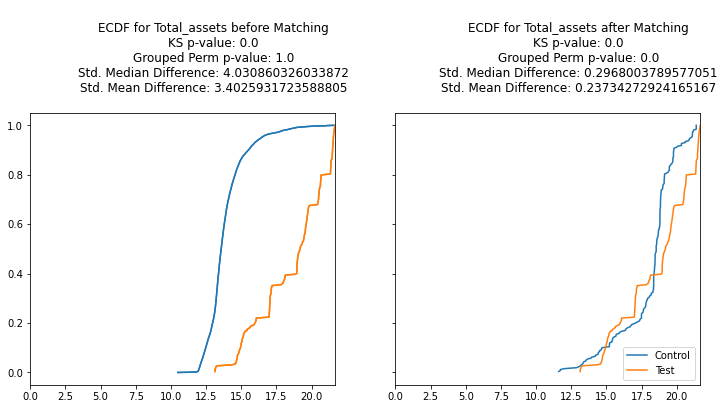

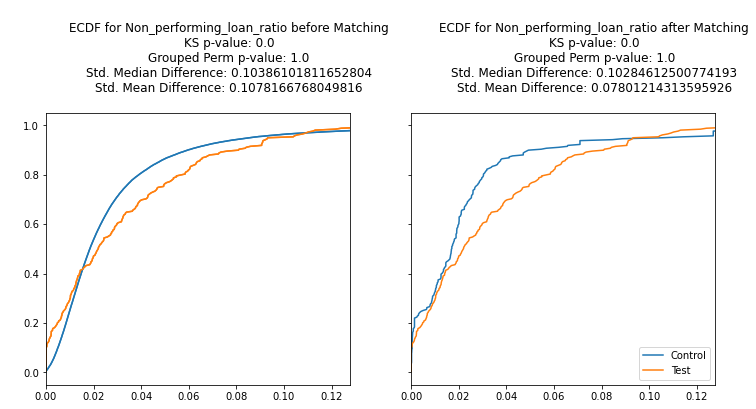

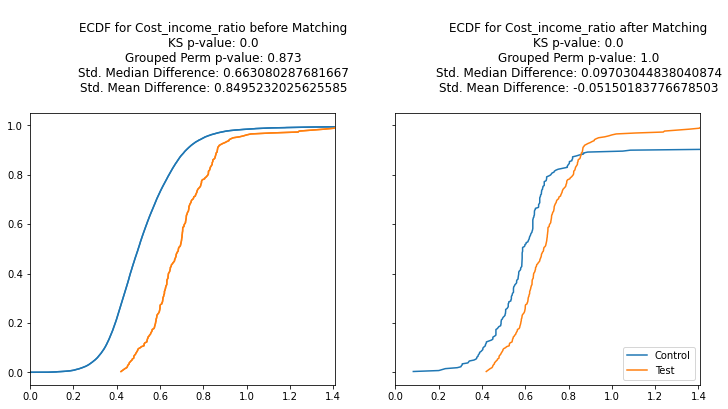

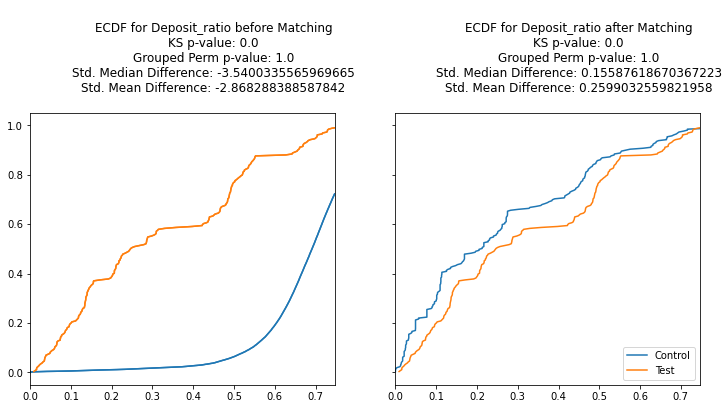

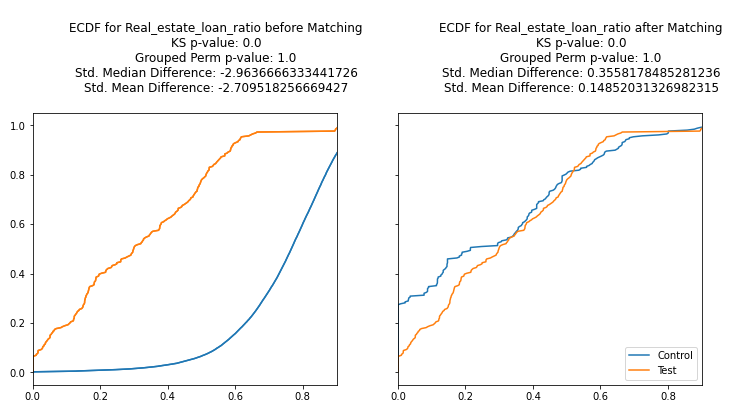

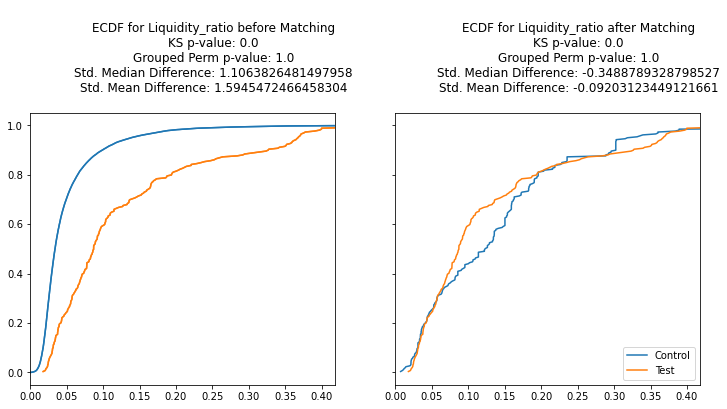

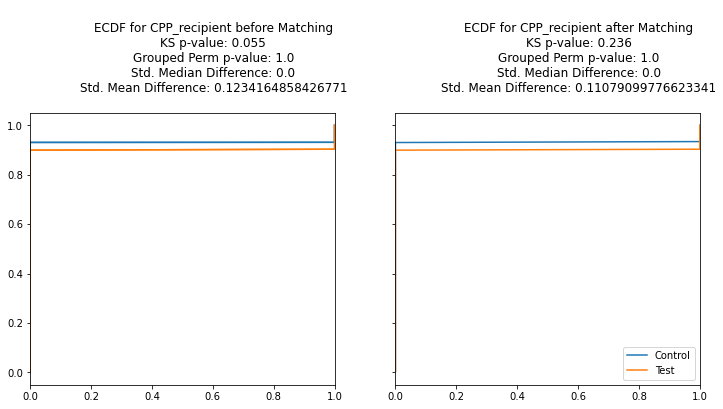

In [19]:
cc = m.compare_continuous(return_table=True)

## Panel B3

In [20]:
# reconstructing panel B3

# add variable Affect_pre2007
df_B3 = df.copy()
df_B3['pre2007'] = np.where(df_B3['Date']<20070000, 1, 0)
df_B3['Affect_pre2007'] = (df_B3['TAR'].mask(~df_B3['pre2007'].eq(1)).groupby(df_B3['Bank']).transform('mean'))

df_B3 = df_B3.set_index(['Bank', 'Date'])
df_B3['After_DFAxAffect_pre2007'] =  df_B3['After_DFA'] * df_B3['Affect_pre2007']
df_B3 = df_B3.dropna()
exog = df_B3.drop(columns = ['TAR', 'After_DFA', 'Affected_BHC','Affect', 'Affect_pre2007', 'pre2007'])

print(df_B3.TAR.shape)
print(exog.shape)

# Regression
FE = PanelOLS(df_B3.TAR, exog,
              entity_effects = True,
              time_effects=True,
              drop_absorbed=True
              )
              
# Result
result = FE.fit(cov_type = 'clustered',
             cluster_entity=True,
             )

result

(38783,)
(38783, 10)


Dep. Variable:,TAR,R-squared:,0.0646
Estimator:,PanelOLS,R-squared (Between):,-0.3925
No. Observations:,38783,R-squared (Within):,0.0639
Date:,"Mon, Oct 25 2021",R-squared (Overall):,-0.4237
Time:,23:19:04,Log-likelihood,1.486e+05
Cov. Estimator:,Clustered,,
,,F-statistic:,251.15
Entities:,2433,P-value,0.0000
Avg Obs:,15.940,Distribution:,"F(10,36378)"
Min Obs:,0.0000,,
Max Obs:,38.000,F-statistic (robust):,3.9808


## Panel B4

In [21]:
# reconstruct panel B4

df_B4 = df.copy()
df_B4['pre2007'] = np.where(df_B4['Date']<20070000, 1, 0)
df_B4['Affect_pre2007'] = (df_B4['TAR'].mask(~df_B4['pre2007'].eq(1)).groupby(df_B4['Bank']).transform('mean'))

df_B4 = df_B4[df_B4['TAR']>0]
df_B4 = df_B4.set_index(['Bank', 'Date'])
df_B4['After_DFAxAffect_pre2007'] =  df_B4['After_DFA'] * df_B4['Affect_pre2007']
df_B4 = df_B4.dropna()
exog = df_B4.drop(columns = ['TAR', 'After_DFA', 'Affected_BHC','Affect', 'Affect_pre2007', 'pre2007'])

print(df_B4.TAR.shape)
print(exog.shape)

# Regression
FE = PanelOLS(df_B4.TAR, exog,
              entity_effects = True,
              time_effects=True,
              drop_absorbed=True
              )
              
# Result
result = FE.fit(cov_type = 'clustered',
             cluster_entity=True
             )

result

(4493,)
(4493, 10)


Dep. Variable:,TAR,R-squared:,0.0744
Estimator:,PanelOLS,R-squared (Between):,0.0851
No. Observations:,4493,R-squared (Within):,0.0785
Date:,"Mon, Oct 25 2021",R-squared (Overall):,0.0854
Time:,23:19:04,Log-likelihood,1.307e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,33.238
Entities:,338,P-value,0.0000
Avg Obs:,13.293,Distribution:,"F(10,4136)"
Min Obs:,0.0000,,
Max Obs:,38.000,F-statistic (robust):,3.1648
